In [2]:
import pandas as pd
import numpy as np
mpg= pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:xlabel='displ', ylabel='hwy'>

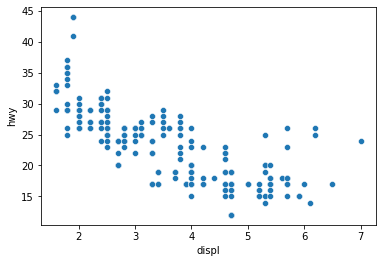

In [4]:
# x축 배기량 displ y축 hwy를 나타내는 산점도(scatterplot)
import seaborn as sns
sns.scatterplot(data=mpg,x='displ',y='hwy')

[(3.0, 6.0)]

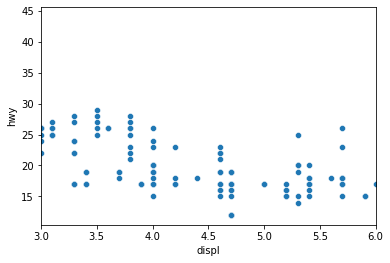

In [5]:
# x축 범위 설정하기
# x축 범위 3-6으로 제한
sns.scatterplot(data=mpg,x='displ',y='hwy').set(xlim=[3,6])

[(3.0, 6.0), (10.0, 30.0)]

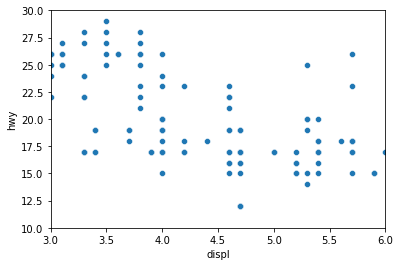

In [6]:
# x축 범위 3-6, y축 범위 10~30으로 제한
sns.scatterplot(data=mpg,x='displ',y='hwy').set(xlim=[3,6],ylim=[10,30])

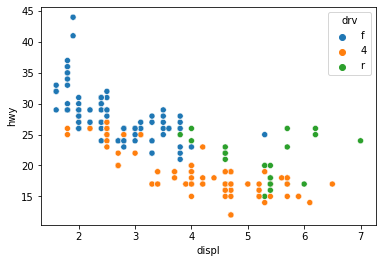

In [12]:
# 종류별로 표식 색깔 바꾸기
# drv별로 표식 색깔 구분해 보기
sns.scatterplot(data=mpg,x='displ',y='hwy',hue='drv');

In [14]:
# 평균 막대 그래프 만들기
# 집단별 평균표 만들기
# drv 별
df_mpg=mpg.groupby('drv').agg(mean_hwy=('hwy','mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [15]:
# drv별 분리
# hwy평균 구하기

df_mpg=mpg.groupby('drv',as_index=False).agg(mean_hwy=('hwy','mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

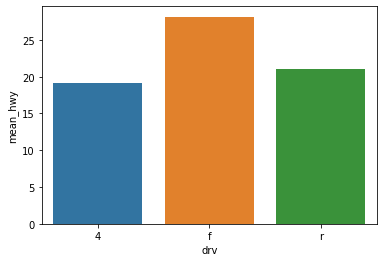

In [19]:
# 막대 그래프 그리기
sns.barplot(data=df_mpg,x='drv',y='mean_hwy')

<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

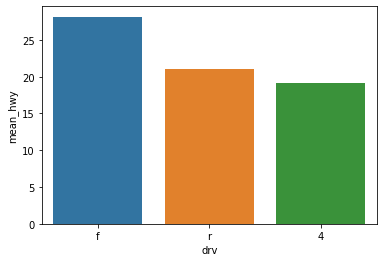

In [22]:
#크기순으로 정렬하기
df_mpg=df_mpg.sort_values('mean_hwy',ascending=False)

# 막대 그래프 그리기
sns.barplot(data=df_mpg,x='drv',y='mean_hwy')

In [25]:
# 집단별 groupby
# 빈도표 count
df_mpg = mpg.groupby('drv',as_index=False).agg(n=('drv','count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<AxesSubplot:xlabel='drv', ylabel='n'>

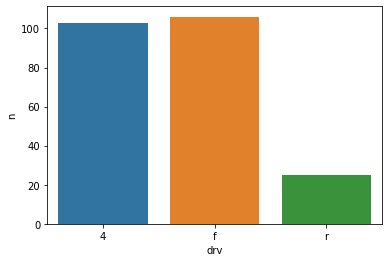

In [27]:
sns.barplot(data=df_mpg,x='drv',y='n')